# Workshop DL01: Deep Neural Networks

## Agenda:
- Introduction to deep learning  
- Apply DNN to MNIST dataset and IEEE fraud dataset

For this workshop we are gonna talk about deep learning algorithms and train DNN models with 2 datasets. We will first start with an easier dataset as demonstration, namely the MNIST dataset. Then we will move on to the harder dataset, which is the IEEE fraud detection dataset, so we can also compare the performance of supervised learning and deep learning models.

## Exercies:
- Think about what features to include in your model and how they should be represented.  
- Think about when we should use traditional models such as Random Forest or deep learning models. (hint: think about the dataset size)

### Deep Learning Paradigm:
There is no clear cut definition of deep learning as many people tend to have different definitions, but the most popular opinion is that deep-learning could be defined as neural network with more than 2 hidden layers and later evolved into including unsupervised neural architectures. 
<img src="paradigm.png">

### Deep Learning Application:
| Neural Network | Application |
| :------------: | :---------: | 
|Standard NN|Real Estate, Online Advertising|
|Convolutional NN|Photo Tagging|
|Recurrent NN|Speech Recognition, Machine Translation|
|Unsupervised NN|Fraud Detection|

### So what is a neural network?
Recall that in the classification workshop we have introduced a GLM model called **Perceptron**. This is actually the very structural building block of neural network (NN).

| Perceptron | Activation |
|:----------:| :--------: |
|<img src="perceptron.png">|<img src="activation.png">|

Notations:
- $g$: activation function (activation function is to capture the non-linearities in the dataset) 
- $X$: input matrix 
- $w_0$: bias 
- $W$: weight matrix


A **NN** can then be viewed as a stack of multi-output perceptrons. For example, the hidden layer is a perceptron with 4 outputs and the output layer is a perceptron with 2 outputs: 
<img src="SNN.png" width="500">
Note that the subscripts indicates the number of layer, e.g. $W^{(1)}$ is the weight matrix for the first layer. 

Vectorization representation: 
$$ Z = w_0^{(1)} + X^TW^{(1)}$$
$$ Y = g(w_0^{(2)} + Z^TW^{(2)})$$
There are many conventions of representing NN, but they mean the same thing.

A **deep neural network (DNN)** is an extension of a single-layer NN with more than 2 hidden layers. For example, some DNN can have upto hundreds of layers:
<img src="DNN.png" width="500">

Note that input and output layers are not counted as the number of layers of a NN. 

Suppose we have a $l$-layer NN then the vectorization representation is: 
$$ Z^{(k)} = w_0^{(k)} + g(Z^{(k-1)})^TW^{(k)}, where \space k = 1,2,..l-1$$
$$ Y = g(w_0^{(l)} + Z^{(l-1)T}W^{(l)})$$

Getting the matrix dimemsion correct can be quite tricky.

### Then how do we train a NN?
First we need to define a **cost function** then update the parameters ($W,w_0$) by minimising the cost. This is known as **back propagation**, whereas computing output is known as **forward propagation**. 

Considering a sample size of n, cost function is a function of predicted output ($\hat{Y^{[i]}}=f(X^{[i]},W)$) and actual output ($Y^{[i]}$): 
$$J(\hat{Y^{[i]}},W) = \frac{1}{n} \sum_{i=1}^n{L(\hat{Y^{[i]}},Y^{[i]})}$$, where $L$ could be:
- binary cross entropy loss: $Y^{[i]}\log{(\hat{Y^{[i]}})}+(1-Y^{[i]})\log{(1-\hat{Y^{[i]}})}$
- mean square loss: $(Y^{[i]}-\hat{Y^{[i]}})^2$

After we define a cost function, we need a way to update the parameters that minimise the cost. There are many ways but let's start with the most basic one, namely **gradient descent**. As the name suggests, we want to find the parameters by decreasing gradient gradually because a function decreases the fastest if one goes from a random point in the opposite direction of the gradient at that point. So we update the parameters like this:
$$new W = old W - \alpha \frac{\partial J(old W)}{\partial old W}$$
where $\alpha$ is the learning rate.

Graph Representation:

|Step 1|Step 2|
|:----:|:----:|
|<img src="step1.png">|<img src="step2.png">|

|Step 3|Step 4|
|:----:|:----:|
|<img src="step3.png">|<img src="step4.png">|


Notice that $J$ is not a direct funtion of $W$, so differentiating it with respect to $W$ is not straight forward. So we need to use Chain Rule: 
$$\frac{\partial J(\hat{Y^{[i]}},W)}{\partial W} = \frac{\partial J(\hat{Y^{[i]}},W)}{\partial \hat{Y^{[i]}}}\frac{\partial \hat{Y^{[i]}}}{\partial Z^{[i]}}\frac{\partial Z^{[i]}}{\partial W}$$


Imgages Source: ©MIT 6.S191: Introduction to Deep Learning [introtodeeplearning.com](http://introtodeeplearning.com/)

### Alternative ways of training NNs:
We have only covered one way of training NN, which is gradient descent. In practise, there are many other concerns as well. For example, the choice of learning rate $\alpha$ have great impact on the whether we can find the true minimum. Too small the $\alpha$ converges slowly and can get stuck in local minima, whereas too big the $\alpha$ will overshoot and might not converge. We can try different values of $\alpha$ which could take a long time, or we can use **adaptive learning rate** (Momentum, RMSProp, Adam, Afagrad, Adadelta, learning rate decay etc.). 

Other than choosing learning rate, there are many popular options to improve training or fitting. Here we provide a list for you to consider:
- Train a small size of data each time: Minibatch Training, Stochastic Gradient Descent
- Normalisation of input, Batch Normalisation
- Regularization: add $l_1, l_2$ in cost funtion, dropout, early stopping, data augmentation  
- Parallelize computation, use of GPU/TPU 

Now enough with the jiber jaber and let's train a DNN!

### Example 1: MNIST Data with Feed Forward Neural Networks 

Our task would be to label each image, as to which number it belong to exactly. For any image classification task, first, we have to understand how are image stored on devices. In this example, all images are 28x28 pixels, hence the input layer dimension would be 784 (28*28). For demonstration, we use a feedforward neural network with 2 hidden layers here. Of course, there are much more complicated neural architectures such as CNN's etc. 

<img src="MnistExamples.png">

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras

#Keras Packages  
#from tensorflow.python import keras
from keras.layers import Input, Dense, Lambda
from keras import optimizers
from keras.utils import plot_model, to_categorical 
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.models import Model, load_model, save_model
from keras.datasets import mnist
print(tf.__version__)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


#### Step 1: Importing the data and Visualization

Training input data shape: (60000, 28, 28)
Testing input data shape: (10000, 28, 28)


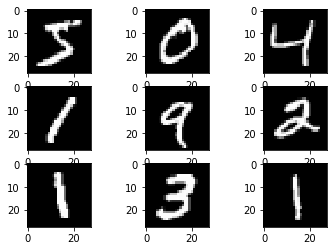

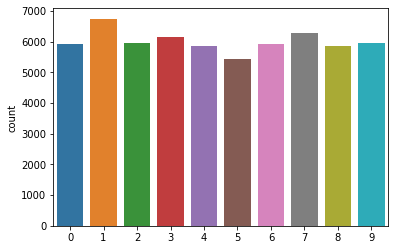

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training input data shape: {}".format(x_train.shape))
#This implies there exist 60,000 images with 28x28 pixels 
print("Testing input data shape: {}".format(x_test.shape))
#This implies there exist 10,0000 images with 28x28

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

sns.countplot(y_train)

#### Step 2: Data preparation 

In [4]:
input_vector_dimension = 28*28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], input_vector_dimension).astype('float32') / 255
print("Training data shape after reshaping: {}".format(x_train.shape))
x_test = x_test.reshape(x_test.shape[0], input_vector_dimension).astype('float32') / 255
print("Testing data shape: {}".format(x_test.shape))
#Why divide by 255? 

y_train = to_categorical(y_train, num_classes)
print("Output training data: {}".format(y_train.shape))
y_test = to_categorical(y_test, num_classes)
print("Output testing data: {}".format(y_test.shape))

Training data shape after reshaping: (60000, 784)
Testing data shape: (10000, 784)
Output training data: (60000, 10)
Output testing data: (10000, 10)


#### Step 3: Designing the neural architecture 

In [5]:
#We will use Keras Functional API, not the sequestion model API

input_layer = Input(shape=(input_vector_dimension,))

hidden_layer_1 = Dense(50, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
output_layer = Dense(10, activation='softmax')(hidden_layer_2)

nn_model = Model(inputs=input_layer, output=output_layer)
nn_model.summary()

# plot_model(nn_model, 'my_first_model.png',show_shapes=True)
# Use Colab when running the above command, so much less trouble 



W0821 16:30:39.928954 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 16:30:39.961920 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 16:30:39.965196 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


/anaconda3/envs/mlsa/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


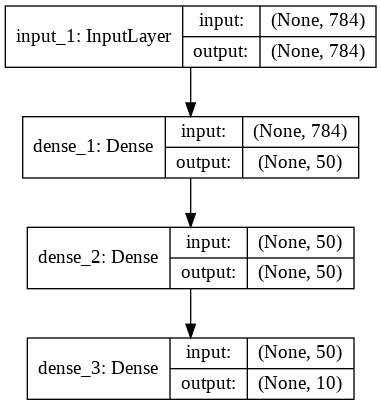

#### Step 4: Train the model 

In [6]:
# specifying the training configuration
nn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

# training 
history = nn_model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=5,
                    validation_split=0.1,verbose=1)

test_scores = nn_model.evaluate(x_test, y_test)

print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

W0821 16:30:41.719826 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 16:30:41.728665 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 16:30:41.849961 4646323648 deprecation.py:323] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 16:30:41.928127 4646323648 deprecation_wrapper.py:119] From /anaconda3/envs/mlsa/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assi

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 10s 185us/step - loss: 0.3256 - acc: 0.9191 - val_loss: 0.1669 - val_acc: 0.9590
Epoch 2/5
54000/54000 [==============================] - 9s 168us/step - loss: 0.1609 - acc: 0.9600 - val_loss: 0.1509 - val_acc: 0.9633
Epoch 3/5
54000/54000 [==============================] - 10s 177us/step - loss: 0.1353 - acc: 0.9677 - val_loss: 0.1491 - val_acc: 0.9655
Epoch 4/5
54000/54000 [==============================] - 9s 168us/step - loss: 0.1285 - acc: 0.9696 - val_loss: 0.1550 - val_acc: 0.9633
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step
Test loss: 0.17636034208834173
Test accuracy: 0.9617


#### Step 4: Monitoring Performance 

Lastly, save the trained model so you can load it later

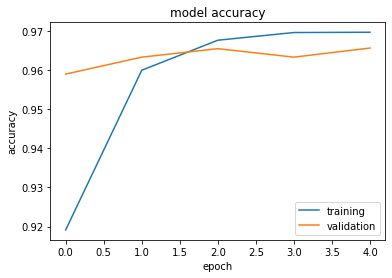

In [7]:
#save_model(nn_model, 'nn_1_model.h5',overwrite=True)
#nn_model.save('nn__model.h5')
#model = keras.models.load_model('nn_model.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Example 2: IEEE Data 

In [10]:
# read csv file into a dataframe
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')

In [11]:
from sklearn.model_selection import train_test_split
train_size = int(0.8*X_train.shape[0])
test_size = X_train.shape[0]-train_size
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train, Y_train, train_size=train_size, test_size=test_size, random_state=4)

In [12]:
X_train.shape

(472432, 431)

In [13]:
# putting everything together
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense( 250, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)
hidden_layer_2 = Dense( 200, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense( 150, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense( 100, activation='relu')(hidden_layer_3)
hidden_layer_5 = Dense( 50, activation='relu')(hidden_layer_4)

output_layer = Dense(1, activation='sigmoid')(hidden_layer_5)

nn_model = Model(inputs=input_layer, output=output_layer)
nn_model.summary()

nn_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

#Define training parameters 
history = nn_model.fit(X_train, Y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.1)

test_scores = nn_model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

nn_model.save('nn_model.h5')

NameError: name 'Dense' is not defined

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

yhat_classes = nn_model.predict(X_test)
yhat_classes.dtype
yhat_classes = np.argmax(yhat_classes, axis=1)
yhat_classes[0:5]

#Y_test.dtype
matrix = confusion_matrix(Y_test.values, yhat_classes)
print(matrix)

[[113954      0]
 [  4154      0]]
